<a href="https://colab.research.google.com/github/SAULIZA/prediccion_de_ventas/blob/main/Prediccion_de_ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREDICCIONES DE VENTAS Proyecto1- Parte5**
## Creado por: Saúl Iza

* Fecha creado: 18/03/2023
* Fecha modificada: 18/03/2023
* Descripción: proyecto


In [1]:
from google.colab import drive
drive.mount ("/content/drive")

Mounted at /content/drive


In [2]:
#manipulacion de base de datos
import pandas as pd
import numpy as np

* Para la parte 5, regresarán al conjunto de datos original con el objetivo de evitar una fuga de datos. 

In [3]:
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn import set_config
set_config(display='diagram')

In [50]:
filename ="/content/drive/MyDrive/sales_predictions.csv"
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


1. Identifiquen el objetivo (X) y las características (y): Asignen la columna "Item_Outlet_Sales" somo el objetivo y el resto de las variables relevantes como el matriz de características. 

In [129]:
#objetivo
y = df["Item_Outlet_Sales"]
#características reelevantes, dentro de este grupo quitaremos a las columnas
#que son poco reelevantes para la prediccion según las partes 2 3 y 4 del proyecto
# las columnas poco relevantes son Item_Identifier, Item_Weight,Item_Visibility,
# Outlet_Identifier,	Outlet_Establishment_Year,	Outlet_Size,Item_Fat_Content
X = df.drop(columns=["Item_Identifier", "Item_Outlet_Sales", "Item_Weight","Item_Visibility","Outlet_Identifier",	"Outlet_Establishment_Year",	"Outlet_Size", "Item_Fat_Content"])

**Razones de la eliminación de las columnas**
* Eliminamos la columna Item_Weight: porque esta columna simplemente se trata de un identificador de un artículo, no da mayor información.
* Eliminamos Item_Weight: porque esta columna da información a cerca del peso del artículo y según se vió en la parte 2 del proyecto, esta característica no tiene relación con la columna de ventas, además que no se observó relación con ninguna otra columna.
* Eliminamos Item_visibility: porque en la parte 3 del proyecto, en el diagrama de calor se puede ver que no hay correlación entre esta columna y la de ventas.
* Eliminamos Outlet_Identifier: ya que esta columna no me da ninguna información que influya en las ventas, simplemente es la identificación de una tienda.
* Eliminamos Outlet_Establishment_Year, ya que según la parte 3 del proyecto en el diagrama de calor, se puede ve que no existe una relación con la columna de ventas.
* Eliminamos Outlet_Size: porque, la información del tamaño de la tienda está de forma implicita en las columnas de  tipo de tienda.
* Eliminamos Item_Fat_Content: porque se pudo ver en la parte 4 del proyecto, en el gráfico donde se relaciona las ventas con la tienda divididos para los productos bajos en grasa y regular en grasa. Ambos tipo de productos no tuvieron una diferencia notable con respecto a las ventas.

In [83]:
X.columns

Index(['Item_Type', 'Item_MRP', 'Outlet_Location_Type', 'Outlet_Type'], dtype='object')

2. Realicen un train test split 

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

3. Creen un pipeline de preprocesamiento para preparar el conjunto de datos para el aprendizaje automático.

En la matriz de características tenemos 4 características:
* Item_Type es una característica nominal
* Item_MRP es una característica numérica
* Outlet_Location_Type es una característica ordinal, donde las tiendas con hubicacion tier 1 son las más estatégicas y asi sucesivamente.
* Outlet_type es una característica ordinal, donde el tipo de tienda supermarket Type 1 son los más grandes, asi sucesivamente con los tipo 2 y 3, y finalmente los grocery store son las tiendas más pequeñas.

In [131]:
#El primer paso sería reemplazar las características de tipo ordinal a un número
outlet_location = {"Tier 1" : 2, "Tier 2" : 1, "Tier 3" : 0} 
X_train["Outlet_Location_Type"] = X_train["Outlet_Location_Type"].replace(outlet_location) 
X_test["Outlet_Location_Type"] = X_test["Outlet_Location_Type"].replace(outlet_location)

outlet_type = {"Supermarket Type1" : 3, "Supermarket Type2" : 2, "Supermarket Type3" : 1, "Grocery Store" : 0}
X_train["Outlet_Type"] = X_train["Outlet_Type"].replace(outlet_type) 
X_test["Outlet_Type"] = X_test["Outlet_Type"].replace(outlet_type) 

**outlet location type**
* Tier 3 = 0, ciudades o regiones pequeñas.
* Tier 2 = 1, ciudades o regiones medianas.
* Tier 1 = 2, ciudades o regiones más grandes y desarrolladas.

**Outlet type**
* Grocery store = 0, tienda pequeña.
* Supermarket type3 =1, tiendas de tamaño pequeño y más grandes que los grocery stores. 
* Supermarket type2 =2, tiendas de tamaño medio.
* Supermarket type1 =3, tiendas de gran tamaño.

In [86]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2131 entries, 7503 to 1784
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Type             2131 non-null   object 
 1   Item_MRP              2131 non-null   float64
 2   Outlet_Location_Type  2131 non-null   int64  
 3   Outlet_Type           2131 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 83.2+ KB


In [87]:
df["Item_Identifier"].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [132]:
#Instanciamos column selector
num_selector = make_column_selector(dtype_include = "number", dtype_exclude ="int")
cat_selector = make_column_selector(dtype_include = "object")

In [133]:
# No hay que hacer imputaciones

# scaler y codificacion one hot encoder
scaler = StandardScaler()
ohe_encoder = OneHotEncoder(sparse_output = False, handle_unknown = "ignore")

In [134]:
#pipelines
#parte numérica
numeric_processing = make_pipeline(scaler)
#parte no numérica
cat_processing = make_pipeline(ohe_encoder) 

In [135]:
#creación de tuplas
num_tuple = (numeric_processing, num_selector)
cat_tuple = (cat_processing, cat_selector)

In [136]:
#instanciamos column transform
col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder = "passthrough")

In [137]:
#ajustamos el pipeline en los datos de entrenamiento
col_transformer.fit(X_train)


ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fc4ca065a60>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fc4ca065730>)])

In [154]:
transform_col_names = col_transformer.get_feature_names_out(X_train.columns)
transform_col_names

array(['pipeline-1__Item_MRP', 'pipeline-2__Item_Type_Baking Goods',
       'pipeline-2__Item_Type_Breads', 'pipeline-2__Item_Type_Breakfast',
       'pipeline-2__Item_Type_Canned', 'pipeline-2__Item_Type_Dairy',
       'pipeline-2__Item_Type_Frozen Foods',
       'pipeline-2__Item_Type_Fruits and Vegetables',
       'pipeline-2__Item_Type_Hard Drinks',
       'pipeline-2__Item_Type_Health and Hygiene',
       'pipeline-2__Item_Type_Household', 'pipeline-2__Item_Type_Meat',
       'pipeline-2__Item_Type_Others', 'pipeline-2__Item_Type_Seafood',
       'pipeline-2__Item_Type_Snack Foods',
       'pipeline-2__Item_Type_Soft Drinks',
       'pipeline-2__Item_Type_Starchy Foods',
       'remainder__Outlet_Location_Type', 'remainder__Outlet_Type'],
      dtype=object)

In [155]:
col_names=['Item_MRP','Item_Type_Baking_Goods', #recuperamos los nombres de las columnas
       'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen_Foods',
       'Item_Type_Fruits_and_Vegetables',
       'Item_Type_Hard_Drinks',
       'Item_Type_Health_and_Hygiene',
       'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood',
       'Item_Type_Snack_Foods',
       'Item_Type_Soft_Drinks',
       'Item_Type_Starchy_Foods','Outlet_Location_Type',
        'Outlet_Type']

In [156]:
#transformacion de datos
X_train_processed = col_transformer.transform(X_train)
X_test_processed = col_transformer.transform(X_test)

In [157]:
X_train_processed

array([[ 1.82810922,  0.        ,  0.        , ...,  0.        ,
         0.        ,  2.        ],
       [ 0.60336888,  0.        ,  0.        , ...,  0.        ,
         0.        ,  2.        ],
       [ 0.24454056,  0.        ,  0.        , ...,  0.        ,
         2.        ,  3.        ],
       ...,
       [ 1.52302674,  0.        ,  0.        , ...,  0.        ,
         1.        ,  3.        ],
       [-0.38377708,  0.        ,  0.        , ...,  0.        ,
         1.        ,  3.        ],
       [-0.73836105,  0.        ,  0.        , ...,  0.        ,
         2.        ,  3.        ]])

In [190]:
#para hacerlo mas visible
X_train_processed_df = pd.DataFrame(X_train_processed, columns=col_names)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=col_names)
X_train_processed_df

,Item_MRP,Item_Type_Baking_Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen_Foods,Item_Type_Fruits_and_Vegetables,Item_Type_Hard_Drinks,Item_Type_Health_and_Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack_Foods,Item_Type_Soft_Drinks,Item_Type_Starchy_Foods,Outlet_Location_Type,Outlet_Type
0,1.828109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,0.603369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
2,0.244541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0
3,-0.952591,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
4,-0.336460,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,-0.044657,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6388,-1.058907,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
6389,1.523027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
6390,-0.383777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0


# Proyecto 1 - Final (básico)
1.  La primera tarea será crear un modelo de regresión lineal para predecir las ventas.

* Creen un modelo de regresión lineal.

In [191]:
#importamos el modelo 
from sklearn.linear_model import LinearRegression

In [192]:
#instanciamos el modelo
reg = LinearRegression()

In [193]:
#entrenamos el modelo en los datos de entrenamiento  
#el modelo aprende la relación entre X e Y
reg.fit(X_train_processed_df,y_train)

LinearRegression()

* Evalúen el rendimiento del modelo basándose en r^2.

In [194]:
#para obtener los datos de R2 despues de ajustar el modelo
train_score_reg = reg.score(X_train_processed_df, y_train)
test_score_reg = reg.score(X_test_processed_df, y_test)
print(train_score_reg)
print(test_score_reg)

0.3884309357558864
0.38821013539487204


El valor de R^2 en el mejor de los casos debe  acercarse a 1, en este caso es de al rededor de 0,388, lo que nos indica que nuestro ajuste no es el adecuado. Algo bueno que se puede observar es que el valor de R^2 de la regresión tando de los datos de entrenamiento como de testeo son muy parecidos. 

In [195]:
# Obtengan las predicciones del conjunto de entrenamiento
X_train_preds_linearReg = reg.predict(X_train_processed_df)
X_test_preds_linearReg = reg.predict(X_test_processed_df)

* Evalúen el rendimiento del modelo basándose en RECM.

Función para calcular el error cuadrático medio

In [196]:
def ECM(vector_real, vector_predicho):#esta función nos va a ayudar a calcular el error cuadrático medio
  suma = 0
  for i_real, i_pred in zip(vector_real, vector_predicho):
    suma = suma + ((i_pred - i_real)**2)
  ec_m = np.sqrt(suma/(len(vector_real)))
  return(ec_m)

In [197]:
ECM(y_train,X_train_preds_linearReg )

1345.3295343109116

In [198]:
ECM(y_test,X_test_preds_linearReg )

1299.1975759505779

El error cuadrático medio es exageradamente grande, tanto en los datos de entrenemiento como en los datos de testeo

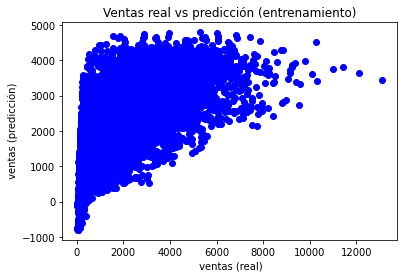

In [235]:
import matplotlib.pyplot as plt
plt.scatter(y_train, X_train_preds_linearReg, c = "b", ) # hace un plot scatter de y vs x 
plt.title("Ventas real vs predicción (entrenamiento)")
plt.xlabel(" ventas (real)") #coloca leyenda en los ejes
plt.ylabel(" ventas (predicción)");

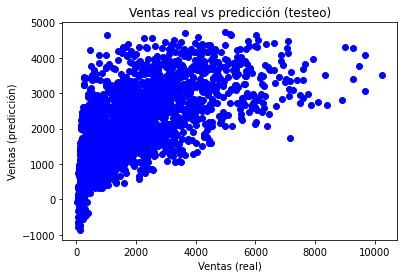

In [238]:
plt.scatter(y_test, X_test_preds_linearReg, c = "b", ) # hace un plot scatter de y vs x 
plt.title("Ventas real vs predicción (testeo)")
plt.xlabel("Ventas (real)") #coloca leyenda en los ejes
plt.ylabel("Ventas (predicción)")
plt.savefig("linear_regression.png", dpi = 300) #guarda la imagen;

En los graficos de ventas real y predicción, se puede ver la mala calidad de la regresión lineal, eso debería aproximarse a una recta.

2. La segunda tarea será crear un modelo de árbol de regresión para predecir las ventas.

* Creen un modelo simple de árbol de regresión.

In [199]:
#importamos el modelo
from sklearn.tree import DecisionTreeRegressor

In [200]:
#instanciamos el modelo
dec_tree = DecisionTreeRegressor(random_state = 42)

In [201]:
#ajustamos el modelo a los datos de entrenamiento
dec_tree.fit(X_train_processed_df, y_train)

DecisionTreeRegressor(random_state=42)

* Comparen el rendimiento del modelo basándose en r^2.

In [202]:
# evaluamos el modelo
train_score_dec_tree = dec_tree.score(X_train_processed_df, y_train)
test_score_dec_tree = dec_tree.score(X_test_processed_df, y_test)
print(train_score_dec_tree)
print(test_score_dec_tree)


0.9974399004862502
0.1754207993213619


La regresión con árbol de decisión tuvo un resultado espectacular con respecto a la regresión con los datos de entrenamiento. Pero con los datos de testeo tiene un rendimiento bajo según R^2. Si comparamos con la regresión lineal, la regresión lineal tiene un R^2 más bajo con los datos de entrenamiento, sin embargo, con los datos de testeo es superior al árbol de desición. Yo apostaría por el árbol de decisión cambiando algunos hiperparámetros, ya que al parecer el modelo se sobreajustó.


* Comparen el rendimiento del modelo basándose en RECM.  

In [203]:
#obtenemos los valores predichos
train_preds_dec_tree = dec_tree.predict(X_train_processed_df)
test_preds_dec_tree = dec_tree.predict(X_test_processed_df)

In [204]:
ECM(y_train, train_preds_dec_tree)

87.04309915279063

In [205]:
ECM(y_test, test_preds_dec_tree)

1508.3087504453877

En el caso de los datos de entrenamiento, el error fue bastante menor a la regresión lineal. pero en el caso de los datos de testeo, el error sigue siendo bastante alto.

Se puede mejorar la regresión usando el árbol de decisión, así:

In [206]:
# Averiguemos cuál fue la profundidad del modelo de arbol de decisión
dec_tree.get_depth()

40

In [207]:
# Lista de valores a probar para max_depth:
max_depth_range = list(range(2, 40))
# Lista para almacenar la puntuación para cada valor de max_depth:
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train_processed_df, y_train)
    score = dec_tree.score(X_test_processed_df, y_test)
    r2.append(score)


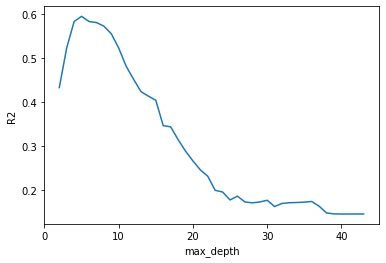

In [177]:
#Visualizamos el valor de R^2 que hace el mejor trabajo
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

In [208]:
#los valores más altos de R^2 
r2_values = pd.DataFrame()
r2_values["depth"]= max_depth_range
r2_values["r2"]=r2
r2_max_values = r2_values.loc[r2_values["r2"]> 0.55,:]
r2_max_values

,depth,r2
2,4,0.584005
3,5,0.595743
4,6,0.583960
5,7,0.581638
6,8,0.572268
7,9,0.559521


La profundidad óptima debe ser de 5.

In [209]:
#instanciamos el modelo para un depth de 5
dec_tree_5 = DecisionTreeRegressor(max_depth = 5, random_state = 42)
#ajustamos el nuevo modelo a los datos de entrenamiento
dec_tree_5.fit(X_train_processed_df, y_train)
#evaluamos con r2 el ajuste
train_5_score = dec_tree_5.score(X_train_processed_df, y_train)
test_5_score = dec_tree_5.score(X_test_processed_df, y_test)
print(train_5_score)
print(test_5_score)

0.60372346324763
0.5957429653721074


A simple vista, se puede observar que los valores de r^2 para los datos de entrenamiento y testeo son muy similares y mucho más cercanos a 1 que en el caso de la regresión lineal.

Evaluemos el ECM

In [210]:
#obtenemos los valores predichos
train_preds_dec_tree_5 = dec_tree_5.predict(X_train_processed_df)
test_preds_dec_tree_5 = dec_tree_5.predict(X_test_processed_df)

In [211]:
#calculamos el error cuadratico medio para los datos de entrenamiento
ECM(y_train, train_preds_dec_tree_5)

1082.9417607894823

In [212]:
#calculamos el error cuadratico medio para los datos de testeo
ECM(y_test, test_preds_dec_tree_5)

1056.0946818228115

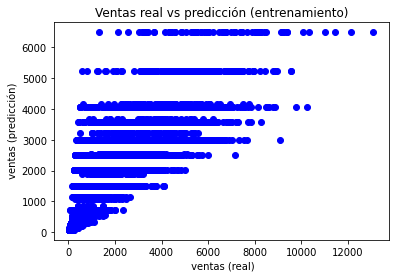

In [239]:
import matplotlib.pyplot as plt
plt.scatter(y_train, train_preds_dec_tree_5, c = "b", ) # hace un plot scatter de y vs x 
plt.title("Ventas real vs predicción (entrenamiento)")
plt.xlabel(" ventas (real)") #coloca leyenda en los ejes
plt.ylabel(" ventas (predicción)");

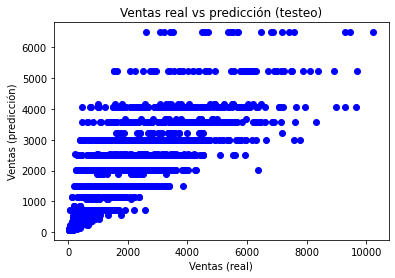

In [241]:
plt.scatter(y_test, test_preds_dec_tree_5, c = "b", ) # hace un plot scatter de y vs x 
plt.title("Ventas real vs predicción (testeo)")
plt.xlabel("Ventas (real)") #coloca leyenda en los ejes
plt.ylabel("Ventas (predicción)")
plt.savefig("decission_tree.png", dpi = 300) #guarda la imagen;

En la gráfica de los valores reales vs la predicción del árbol de regresión, se puede observar que esta vez la predicción es de mejor calidad comparada con la obtenida por la regresión lineal. Sin embargo aún no es la ideal.

**Conclusiones:**
* Con base en los resultados obtenidos, y de las puntuaciones R^2 y error cuadrático medio, concluimos que el modelo que predice mejor las ventas es el árbol de decisión. 
* Según algunos ejemplos, la regresión lineal es un buen modelo para predecir ventas, pero en este caso se obtuvo que el árbol de decisión es el mejor, probablemente debido a la influencia de las distintas características ordinales de cada producto.
* A pesar de que el árbol de decisión tiene una puntuación R^2 alta